Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
data_car = pd.read_csv(r"C:\Users\Pradeep\OneDrive\Desktop\Oasisinfobytes\Task3\car data.csv")

In [4]:
data_car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data_car.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
data_car.tail(20)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
281,city,2006,2.10,7.60,50456,Petrol,Dealer,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0
283,city,2016,8.99,11.80,9010,Petrol,Dealer,Manual,0
284,brio,2013,3.50,5.90,9800,Petrol,Dealer,Manual,0
285,jazz,2016,7.40,8.50,15059,Petrol,Dealer,Automatic,0
286,jazz,2016,5.65,7.90,28569,Petrol,Dealer,Manual,0
287,amaze,2015,5.75,7.50,44000,Petrol,Dealer,Automatic,0
288,city,2015,8.40,13.60,34000,Petrol,Dealer,Manual,0
289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
290,amaze,2014,4.50,6.40,19000,Petrol,Dealer,Manual,0


Information about dataset

In [7]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data_car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data_car.size

2709

In [10]:
data_car.shape

(301, 9)

In [11]:
data_car.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Car_Name   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Selling_

In [12]:
data_car.duplicated().sum()

2

In [13]:
data_car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
print(data_car.Year.value_counts())
print(data_car.Selling_Price.value_counts())
print(data_car.Present_Price.value_counts())
print(data_car.Driven_kms.value_counts())
print(data_car.Fuel_Type.value_counts())
print(data_car.Selling_type.value_counts())
print(data_car.Owner.value_counts())

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64
Selling_Price
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: count, Length: 156, dtype: int64
Present_Price
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: count, Length: 148, dtype: int64
Driven_kms
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


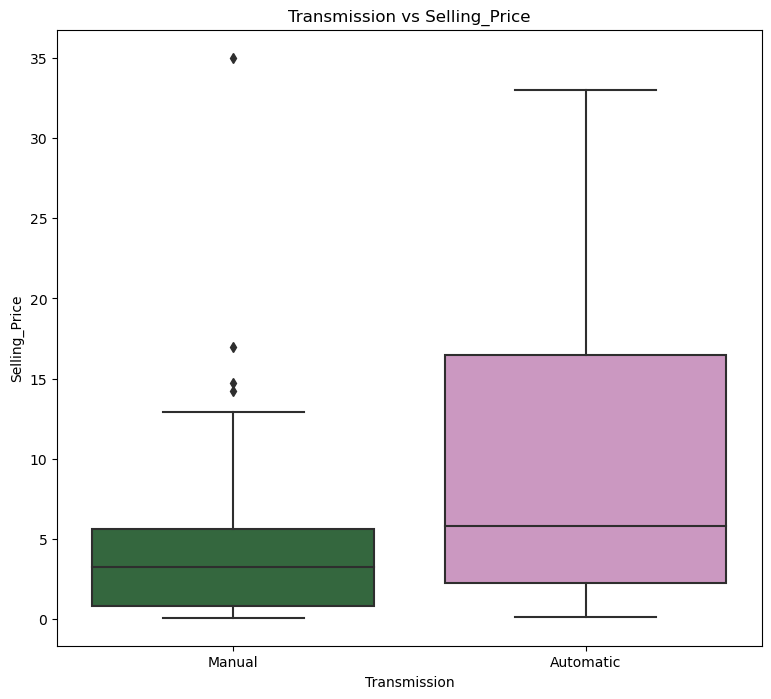

In [15]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Transmission vs Selling_Price')
sb.boxplot(x=data_car.Transmission, y=data_car.Selling_Price, palette=("cubehelix"))
pt.show()

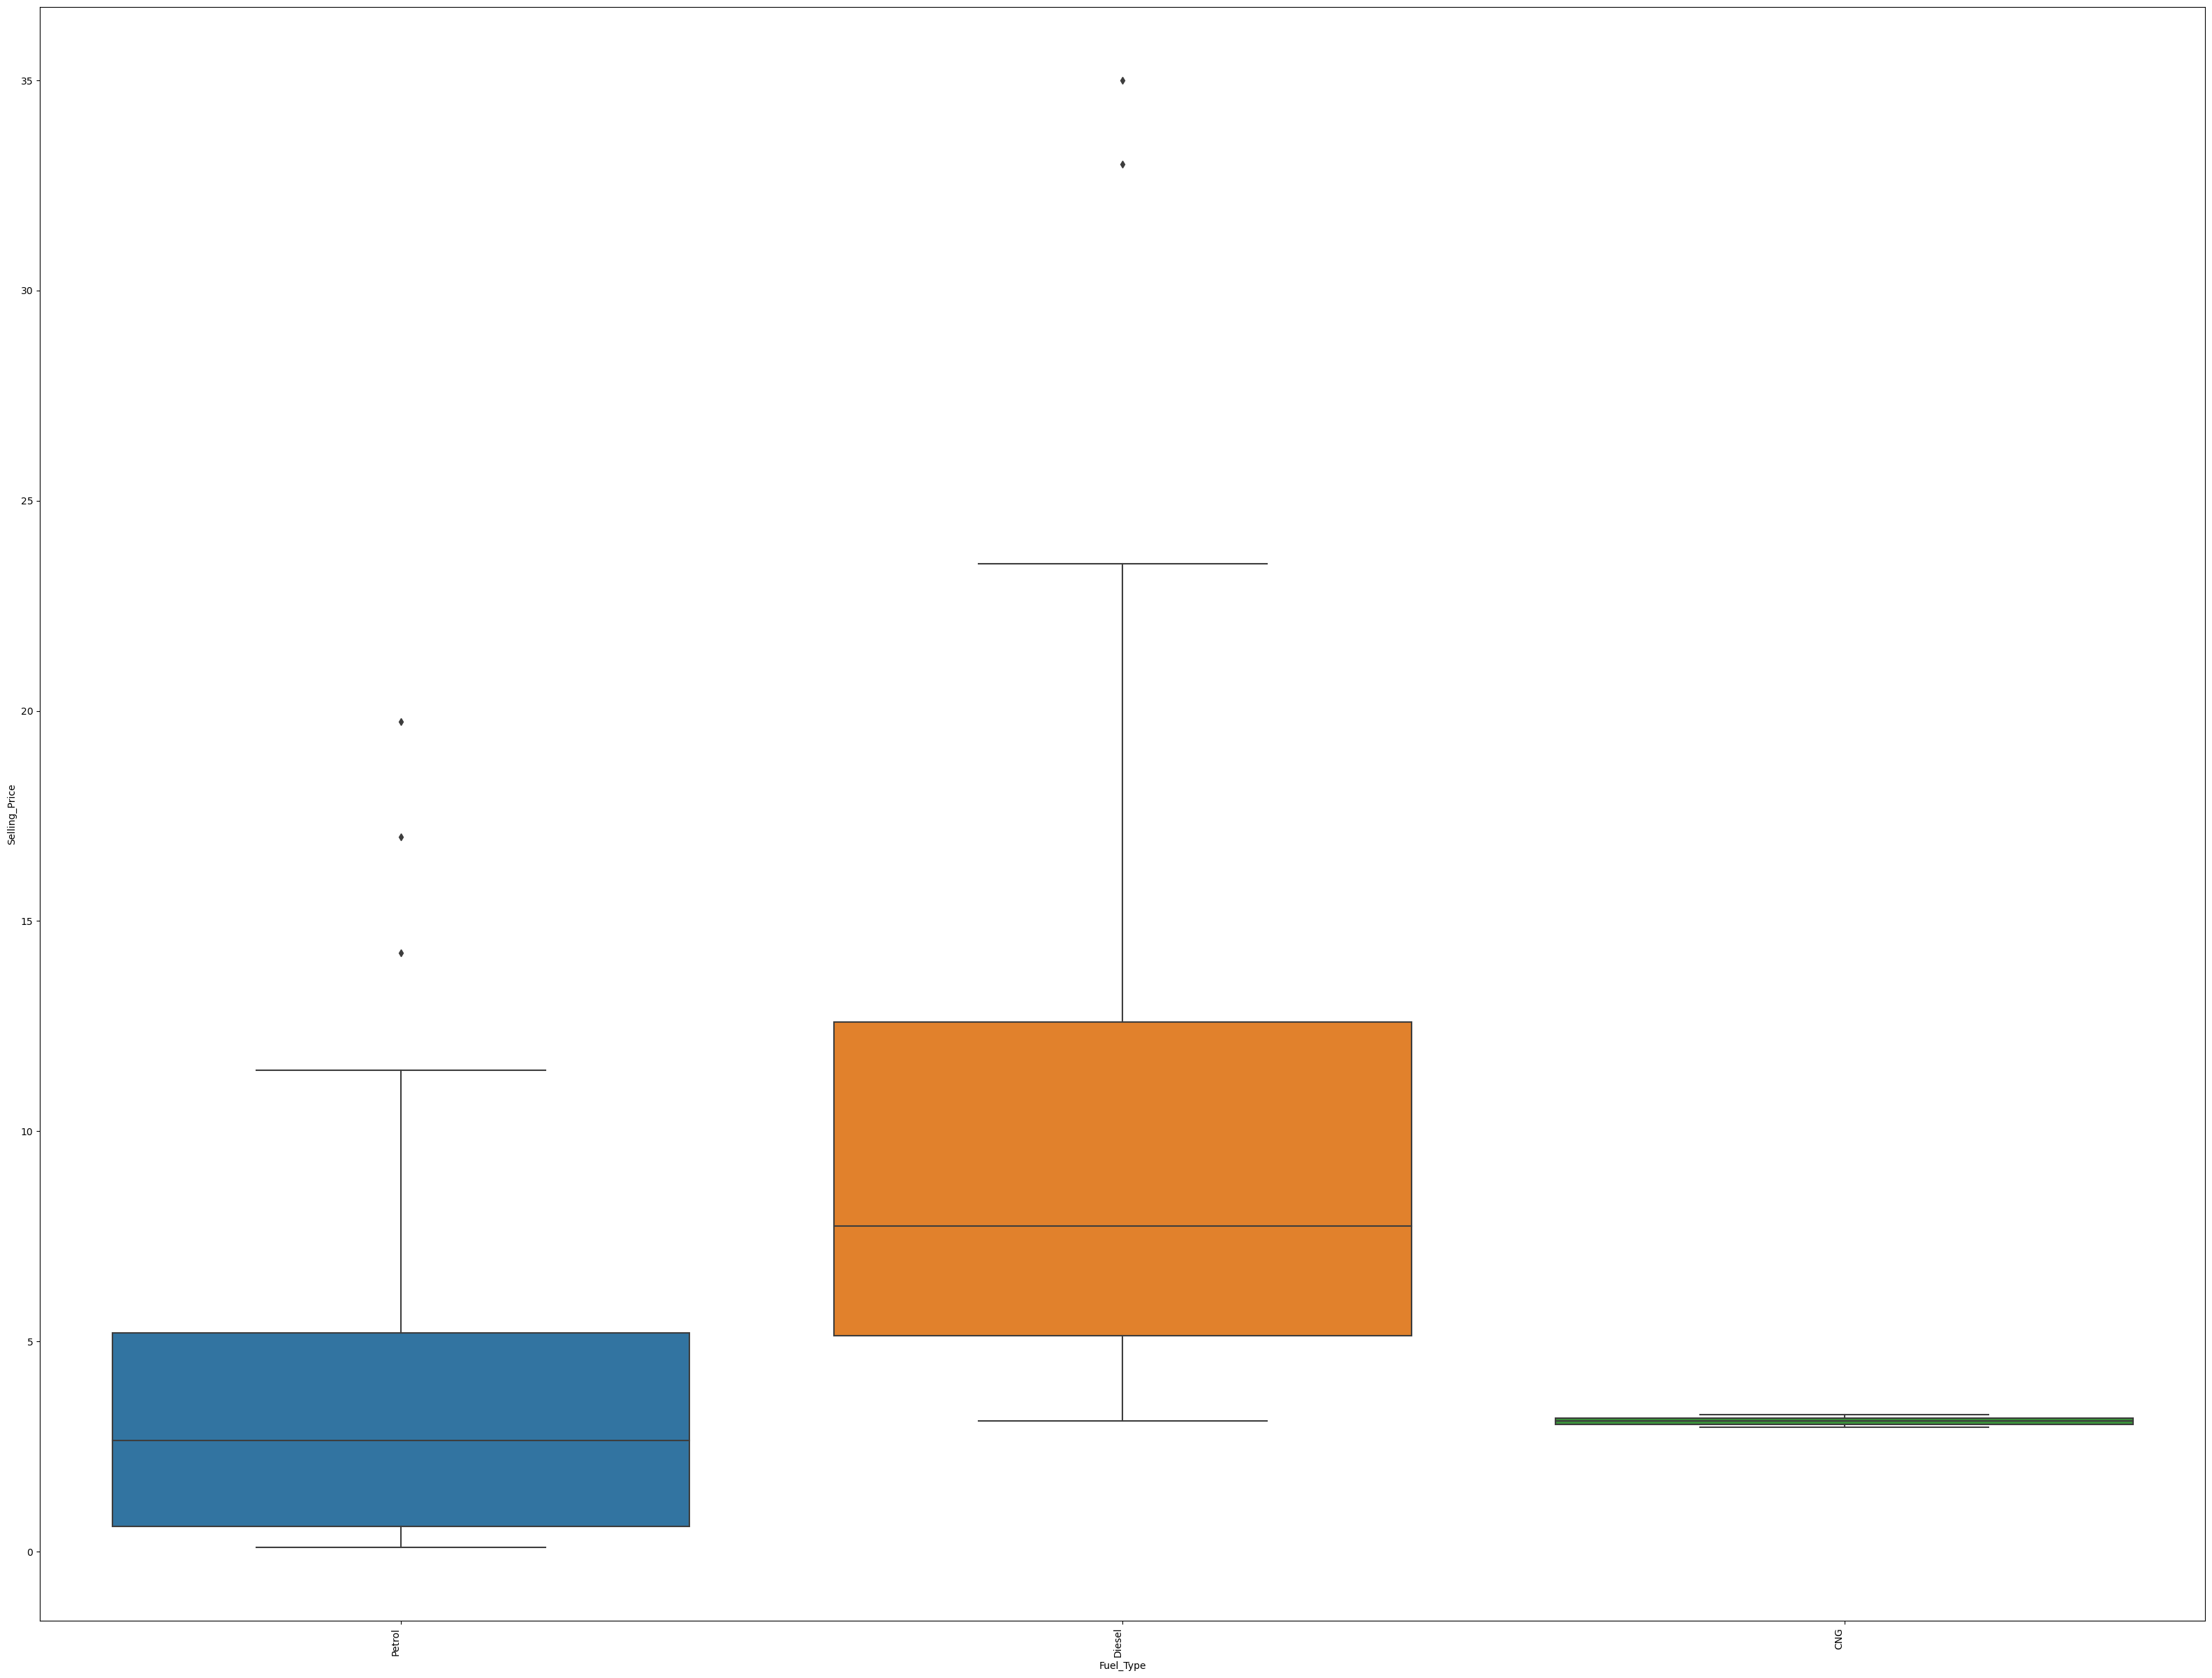

In [16]:
pt.subplots(figsize=(40,30))
a=sb.boxplot(x='Fuel_Type',y='Selling_Price',data=data_car)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

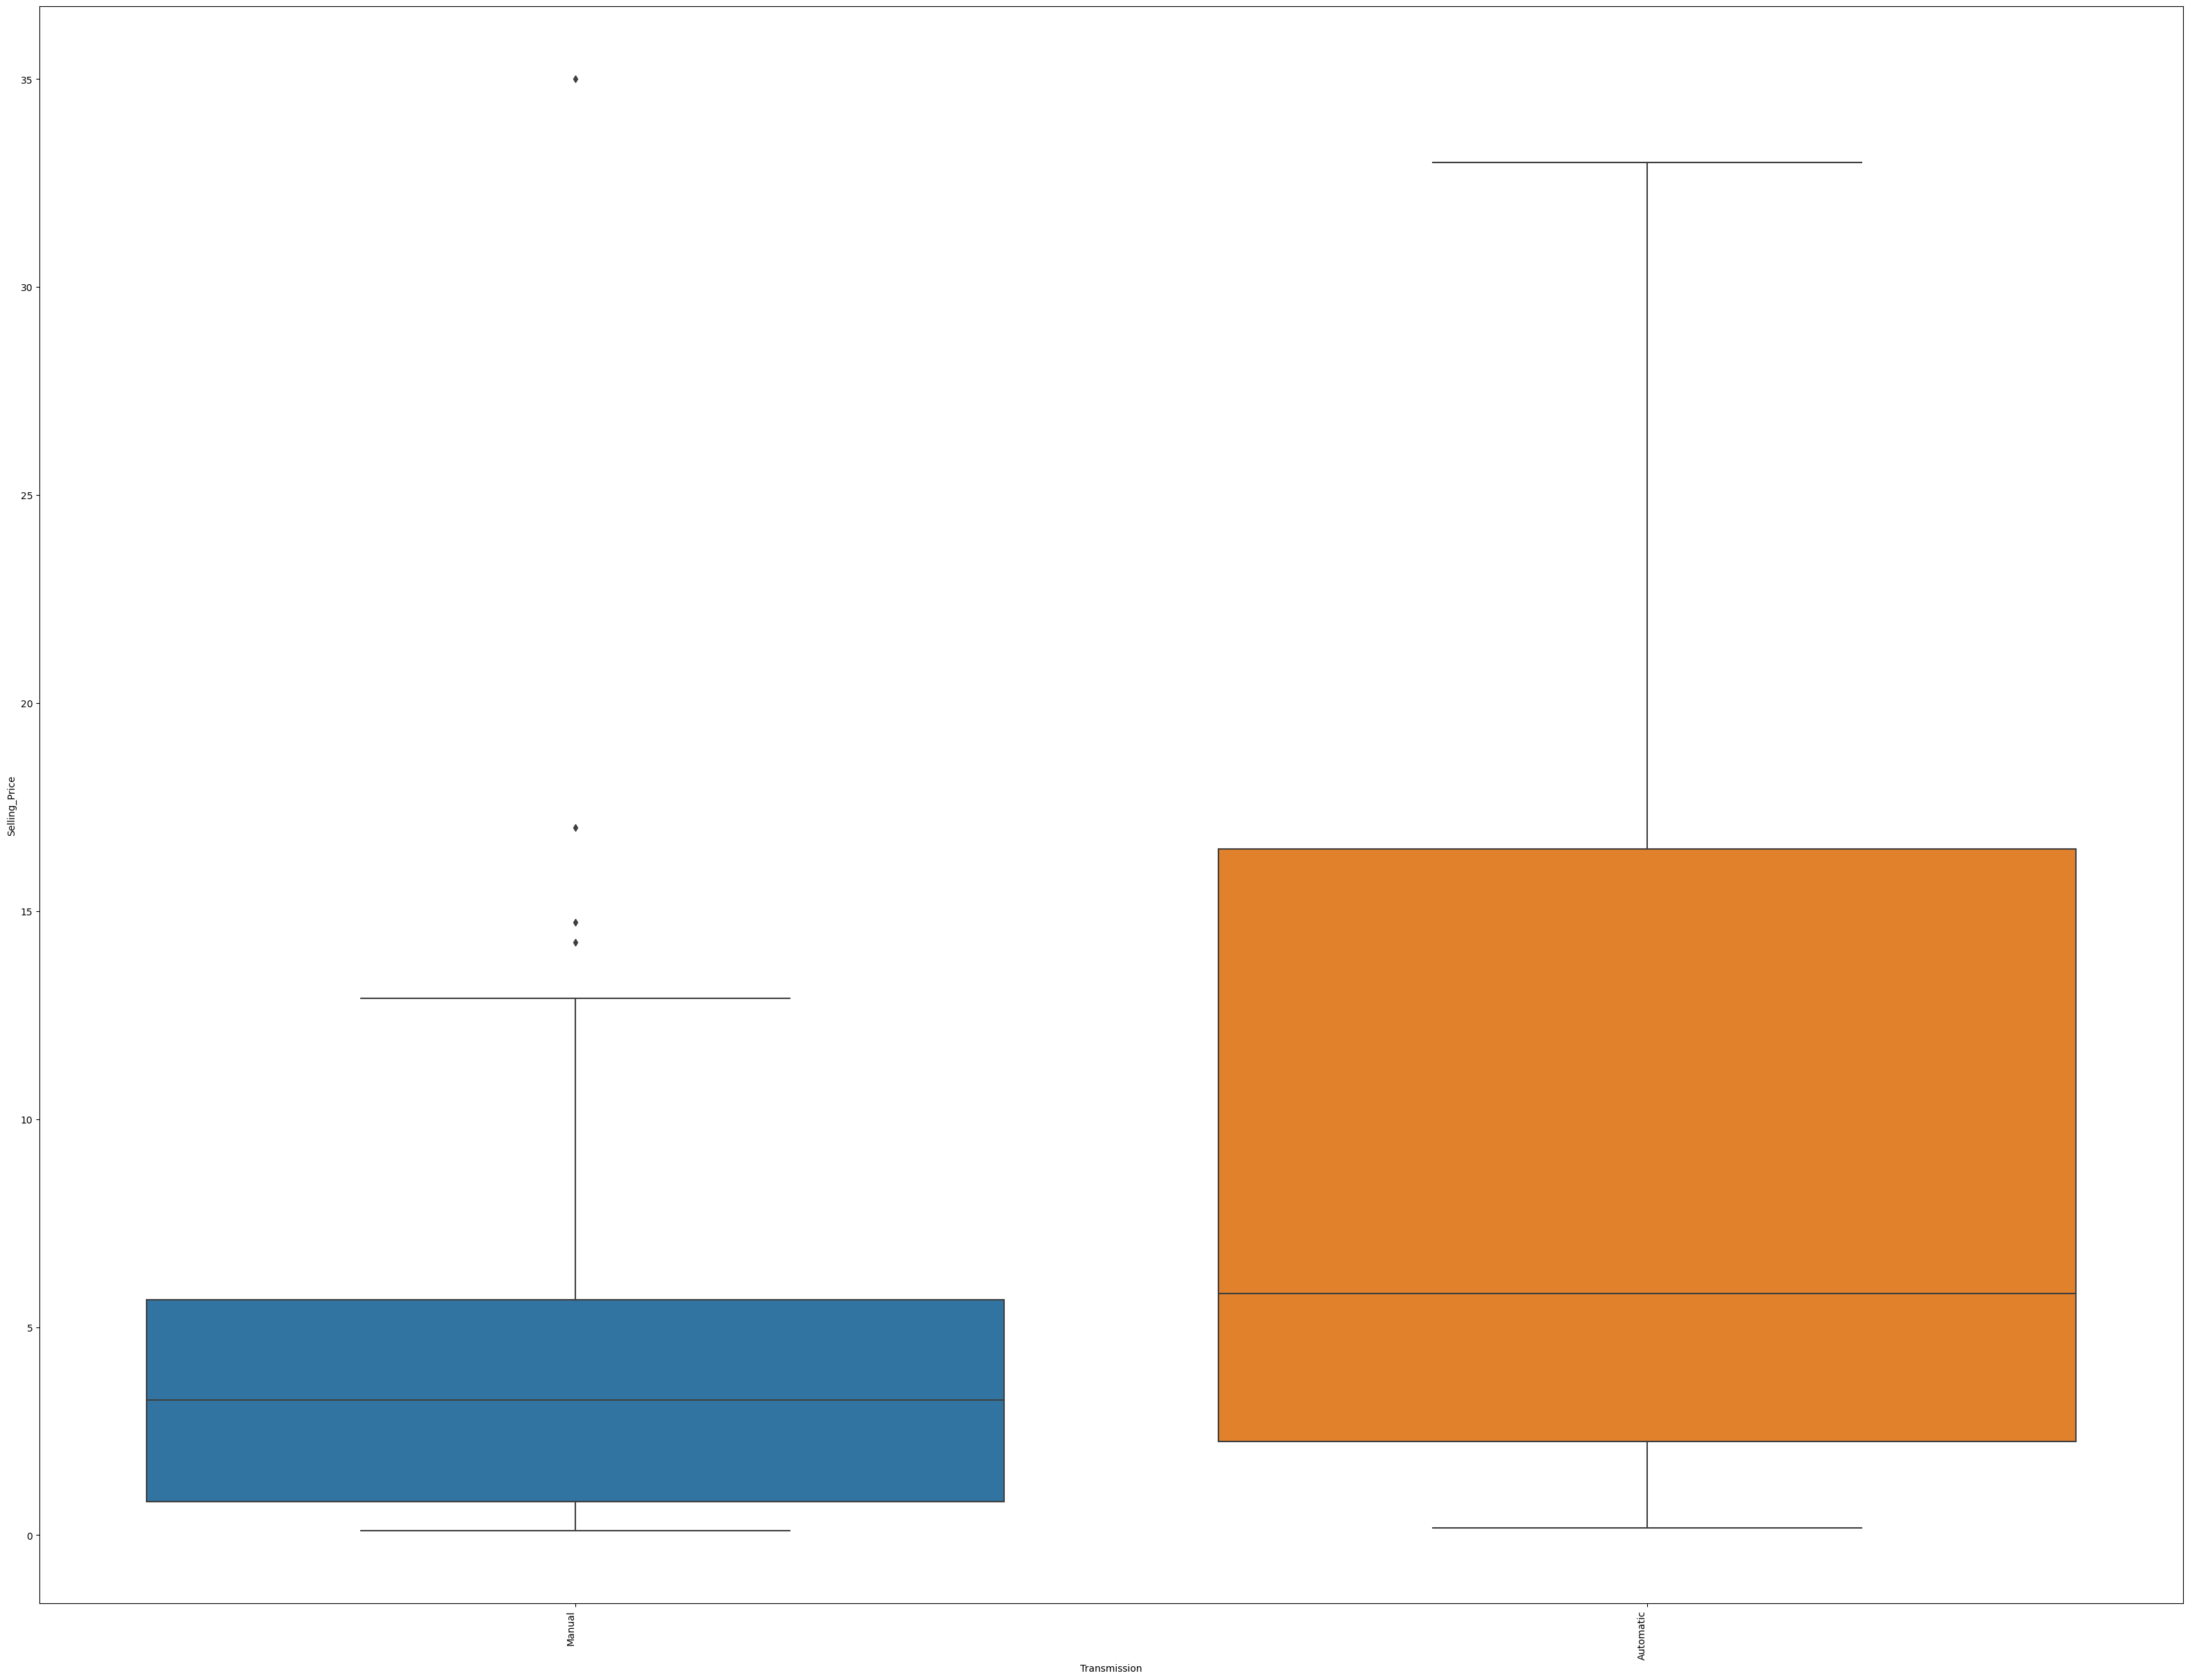

In [18]:
pt.subplots(figsize=(40,30))
a=sb.boxplot(x='enginetype',y='price',data=data_car)
a.set_xticklabels(a.get_xticklabels(),rotation=90,ha='right')
pt.show()

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_14964\3082441020.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_car.Selling_Price)


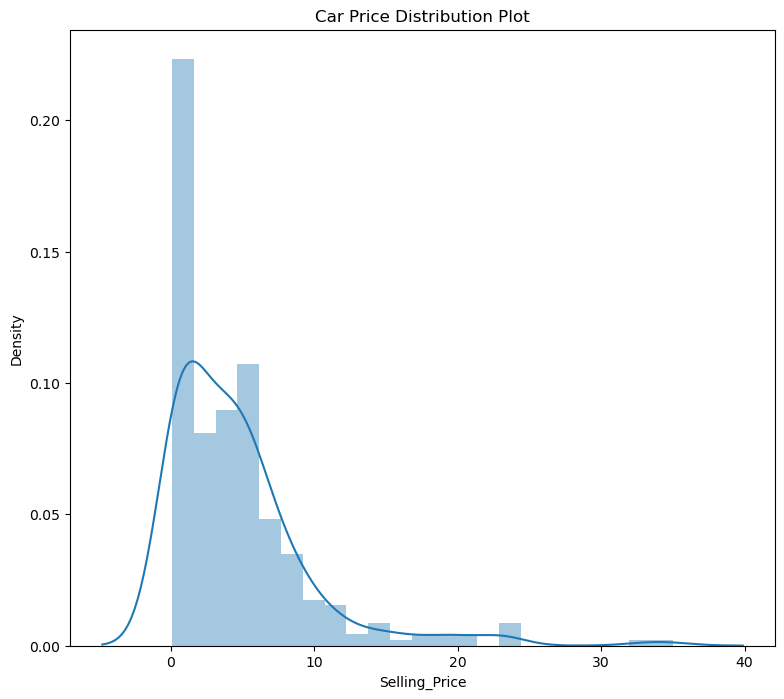

In [19]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,1)
pt.title('Car Price Distribution Plot')
sb.distplot(data_car.Selling_Price)
pt.show()

<Axes: title={'center': 'Car Price Spread'}, ylabel='Selling_Price'>

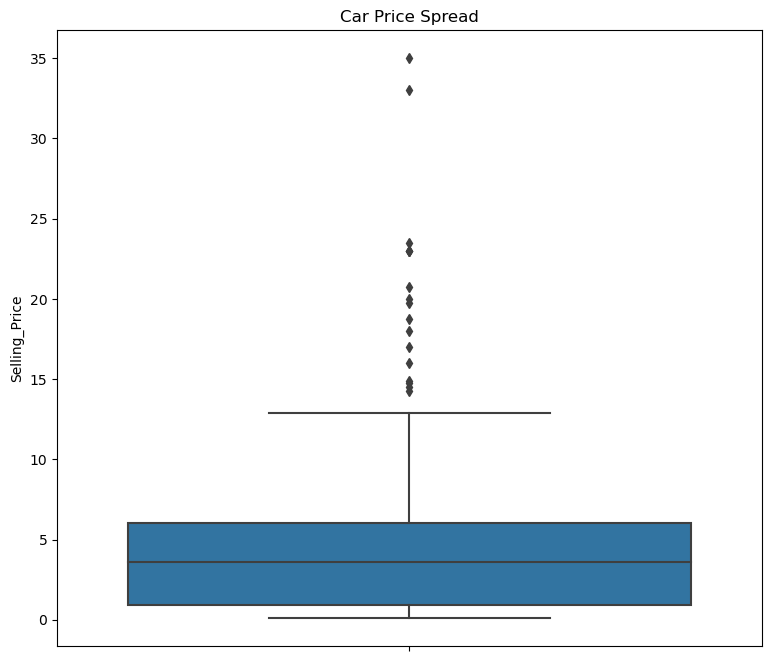

In [20]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Car Price Spread')
sb.boxplot(y=data_car.Selling_Price)

C:\Users\Pradeep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


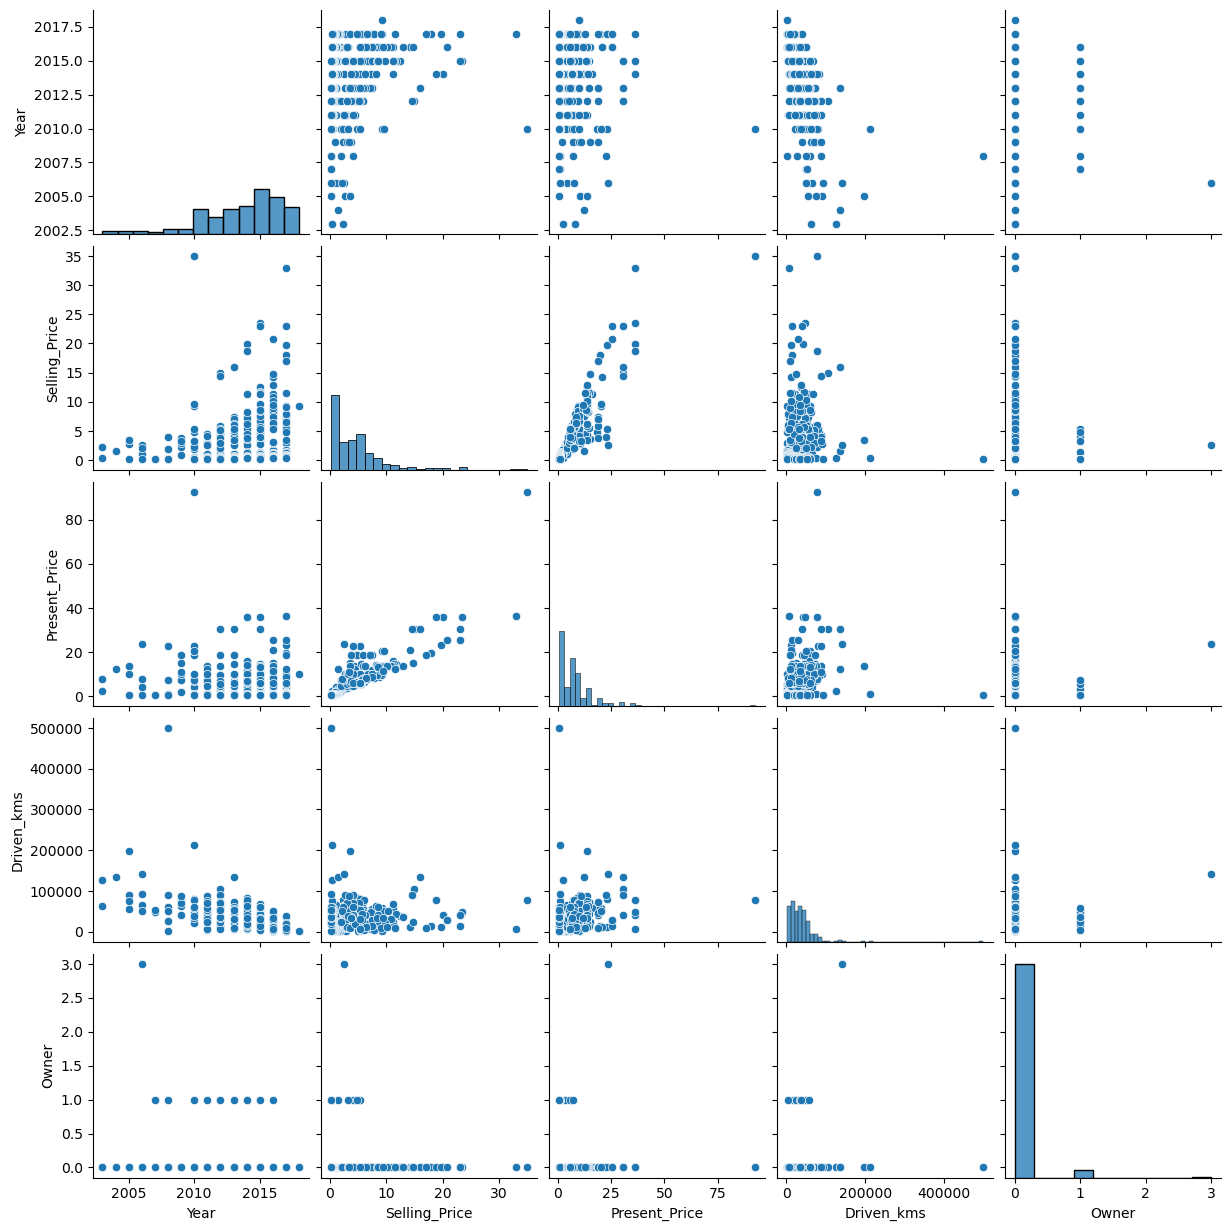

In [24]:
sb.pairplot(data_car)

Training and Testing